# YOLO - Learning and Testing from Scratch
## Define your model : 

You need to create a repository : 

In [1]:
model_name = "nao"

import os
ROOT_DIR = os.path.abspath(os.curdir)
download_directory = ROOT_DIR + "/PICTURES_DATABASE/"
pics_directory = download_directory  + model_name
print("You work for an image recognition for the", model_name, "inside the directory :", ROOT_DIR)

You work for an image recognition for the nao inside the directory : /home/tonycalvez/GitHub/DEEPDART


## Download : 
First step, you need to download minimum 250 pics with of your model with google images.
You need to find three or four related keywords with the model : 

In [3]:
keywords = ["robot", "school", "humanoide", "aldebaran"]

nb_pics_downloaded_by_keyword = 1 

from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
for keyword in keywords:
    arguments = {"keywords":model_name + " " + keyword,"limit":nb_pics_downloaded_by_keyword, "print_urls":False, "format":"jpg", "output_directory":download_directory, "image_directory": model_name}
    paths = response.download(arguments)
    


Item no.: 1 --> Item name = nao robot
Evaluating...
Starting Download...
Completed Image ====> 1.robot-humanoide-programmable-nao-v6.jpg

Errors: 0


Item no.: 1 --> Item name = nao school
Evaluating...
Starting Download...
Completed Image ====> 1.NAO.jpg

Errors: 0


Item no.: 1 --> Item name = nao humanoide
Evaluating...
Starting Download...
Completed Image ====> 1.Nao_Robot_%28Robocup_2016%29.jpg

Errors: 0


Item no.: 1 --> Item name = nao aldebaran
Evaluating...
Starting Download...
Completed Image ====> 1.Nao_Robot_%28Robocup_2016%29.jpg

Errors: 0



## Check and Match!
Try to check all pics and verify if all pics have your model.
Moreover it's very important to match your pics and delete the duplicates!

In the bash to install the gthumb software : 
```
sudo apt-get install gthumb 
```

![GTHUMB_DUPLICATES.png](IMG/GTHUMB_DUPLICATES.png)

In [8]:
import os
os.system("gthumb " + pics_directory)

0

This script rename all pictures with a number:

In [49]:
import os
i = 0
for root, dirs, files in os.walk(pics_directory):
    for i,f in enumerate(files):
        absname = os.path.join(root, f)
        newname = os.path.join(root, "data_"+str(i)+".jpg")
        os.rename(absname, newname)
if i < 250:
    print("You have only : ", str(i), "/250 pictures in your database")
    print("Please restart the google image downloader with others keywords")
    
else : 
    print("You have : ", str(i), "pictures! Good Job!")
    

You have only :  7 /250 pictures in your database
Please restart the google image downloader with others keywords


## Scrap and Label your Pics.
In this part, I think this is the worst moment of the project! You need to scrap and label all pictures in your database.
This sofware will generate a YOLO dataset for each picture in the folder. 

In the bash to install the labelImg software : 
```
sudo apt-get install pyqt5-dev-tools
sudo pip install lxml
cd ~/Downloads
git clone https://github.com/tzutalin/labelImg
cd labelImg-master
make qt5py3
```

![scrapping.png](IMG/jupyter6.png)

In [ ]:
import os
os.system("labelImg " + pics_directory + " " + model_name)

## Convert Pascal VOC to YOLO
In this part, if you have used an other software. You can convert your data with the format Pascal VOC inside a XML File to YOLO format in a txt file.
We have implemented this converter inside the project.

![xml_yolo.png](IMG/jupyter7.png)

Please, change classes below : 

In [3]:
classes = ["nao", "dart", "uuv"]

import os
ROOT_DIR = os.path.abspath(os.curdir)
file = open(ROOT_DIR + "/PASCALVOC_TO_YOLO/classes.txt", "w")
for classe in classes:
    file.write(classe + "\n")
file.close()
                    

os.system("cd " + ROOT_DIR)
os.system("cd PASCALVOC_TO_YOLO")
os.system("python xmltotxt.py -xml " + pics_directory + " -out " + pics_directory)

# YOLO - Presentation
You only look once (YOLO) is a state-of-the-art, real-time object detection system. 
We can discover the SDK : https://pjreddie.com/darknet/yolo/

![yolo.png](IMG/jupyter2.png)


In [3]:
import os
ROOT_DIR = os.path.abspath(os.curdir)
DARKNET_DIR = ROOT_DIR + "/darknet/"

pics_directory_darknet = DARKNET_DIR + "VOCdevkit"

## Data Augmentation
Deep learning frameworks usually have built-in data augmentation utilities, but those can be inefficient or lacking some required functionality.
Inside YOLO, we don't have this part, and we have implemented a data augmentation. This python generates 9 different version of each picture : 
- Origin.jpg
- Gaussian.jpg
- Median.jpg
- Clahe.jpg
- Gamma_Augmentation.jpg 
- Gaussian_Noisy.jpg 
- Pepper_Noisy.jpg
- Horizontal_Flip.jpg
- Vertical_Flip.jpg

![data_augmentation.png](IMG/jupyter3.png)

In [ ]:
from data_augmentation import dataAugmentation
generate = dataAugmentation(pics_directory, os.listdir(pics_directory)[0])
generate.main(pics_directory, pics_directory_darknet)
print("The data have been augmented!")

## Train and Test the Dataset
In this part, we split our database in two parts : 
- Training Dataset (95%)
- Test Dataset (5%)

![data.png](IMG/jupyter11.png)

The model is initially fit on a training dataset and the testing dataset will make predictions on data.

In [ ]:
import glob, os
pics_directory_darknet_relative = 'VOCdevkit/'
percentage_test = 5

file_train = open('darknet/ENSTA/train.txt', 'w')  
file_test = open('darknet/ENSTA/test.txt', 'w')
counter = 1  
index_test = round(100 / percentage_test)  

for pathAndFilename in glob.iglob(os.path.join(pics_directory_darknet, "*.jpg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test:
        counter = 1
        file_test.write(pics_directory_darknet_relative + title + '.jpg' + "\n")
    else:
        file_train.write(pics_directory_darknet_relative + title + '.jpg' + "\n")
        counter = counter + 1
        
file_train.close()
file_test.close() 

## Configure YOLO :
In this part, we are preparing the different config files.

In [42]:
list_names = classes
nb_class = str(len(list_names))

file_obj = open(DARKNET_DIR + 'ENSTA/obj.data', 'w')
file_obj.write("classes = " + nb_class + "\ntrain  = ENSTA/train.txt \nvalid  = ENSTA/test.txt \nnames = obj.names \nbackup = backup/")
file_obj.close()

file_names = open(DARKNET_DIR + 'ENSTA/obj.names', 'w')
for name in classes:
    file_names.write(name + "\n")
file_names.close()
    

## Download the YOLO weight :
In this part, we are downloading the empty weight and will generate a trained model.

In [46]:
os.system("wget https://pjreddie.com/media/files/darknet53.conv.74")

os.system("mv  " + ROOT_DIR + "/darknet53.conv.74 " + DARKNET_DIR + "ENSTA/")

0

## DIY your YOLO Neural Network :
In this part, we are change the neural network to return the classes values correctly.
We will need to modify the YOLOv3 tiny model (yolov3-tiny.cfg) to train our custom detector.

![installation.png](IMG/jupyter4.png)

In [ ]:
os.system("cp  " + DARKNET_DIR + "/cfg/yolov3-tiny.cfg " + DARKNET_DIR + "ENSTA/")

os.system("sed -i 's/batch=1/batch=128/' "+DARKNET_DIR+"/yolov3-tiny.cfg")
os.system("sed -i 's/subdivisions=1/subdivisions=8/' "+DARKNET_DIR+"/yolov3-tiny.cfg")
os.system("sed -i 's/classes=80/classes="+nb_class+"/' "+DARKNET_DIR+"/yolov3-tiny.cfg")
os.system("sed -i 's/filters=255/filters="+(nb_class+5)*3+"/' "+DARKNET_DIR+"/yolov3-tiny.cfg")

## Compile the YOLO software :
In this part, we compile YOLO for your machine.
This installation below is released for a machine included Cuda, OpenMP, and OpenCV correctly build.

![installation.png](IMG/jupyter1.png)

In [ ]:
os.system("sed -i 's/GPU=0/GPU=1/' "+DARKNET_DIR+"Makefile")
os.system("sed -i 's/CUDNN=0/CUDNN=1/' "+DARKNET_DIR+"Makefile")
os.system("sed -i 's/OPENCV=0/OPENCV=1/' "+DARKNET_DIR+"Makefile")
os.system("sed -i 's/OPENMP=0/OPENMP=1/' "+DARKNET_DIR+"Makefile")

os.system("cd "+DARKNET_DIR)
os.system("make")

## Train your YOLO model :
Open your terminal, go to your directory and let's go train your YOLO model with the command below:
With a computer :
```
./darknet train ENSTA/obj.data ENSTA/yolov3-tiny.cfg ENSTA/darknet53.conv.74 --map
```

With a cluster machine :
```
run slurm script=darknet.sh -c 28 gpus=2 mem=30000
```

## Choose your YOLO weight :
Inside the backup folder, you can find your generated weight with different value.
To select the best weight to avoid the overfitting, you need to trace the learning curve.
(This file have been generated with the cluster, you can also copy and paste in txt the terminal contening the the training).

The best value just after the intersection between the learning curve and the Y.

![curve.png](IMG/jupyter5.png)

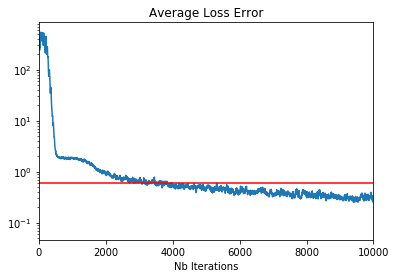

In [2]:
file = open('/home/tonycalvez/GitHub/DEEPDART/darknet1.sh.out', 'r')
avgLossError = []

import re
import matplotlib.pyplot as plt
%matplotlib inline
for line in file:
    arguments = line.split(", ")

    for argument in arguments:
        if re.match('^[\d]+\W+[\d]+\W+avg', argument) is not None:
            try:
                avgLossError.append(float(argument.split()[0]))
            except ValueError:
                pass
file.close()

plt.plot(avgLossError)
plt.axhline(y=0.60730, color='r', linestyle='-')
plt.title('Average Loss Error')
plt.yscale('log')
plt.xlabel("Nb Iterations")
plt.xlim(left=0)
plt.xlim(right=10000)
plt.show()

## Test your YOLO model : 
Check the last version of your weights inside the backup folder.

![test.png](IMG/jupyter10.png)

Before start the test, we need to change the neural networks file.

In [ ]:
os.system("sed -i 's/batch=64/batch=1/' "+DARKNET_DIR+"/yolov3-tiny.cfg")
os.system("sed -i 's/subdivisions=8/subdivisions=1/' "+DARKNET_DIR+"/yolov3-tiny.cfg")

Open your terminal, go to your directory and let's go test your YOLO model with the command below:

With a computer with camera:
```
./darknet detector demo ENSTA/obj.data ENSTA/yolov3-tiny.cfg backup/yolov3-tiny_XXXX.weights /dev/video1
```

![demonstation.png](IMG/jupyter9.png)

@article{yolov3,
  title={YOLOv3: An Incremental Improvement},
  author={Redmon, Joseph and Farhadi, Ali},
  journal = {arXiv},
  year={2018}
}